
# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
The columns that i plan to use in the analysis are:
###### popularity(int) --- It shows how popular a movie is
###### budget(int) --- The column contain information about budgeted money for the movies in dollars
###### revenue(int) --- It contains information about the revenue generated by the movie
###### genres(str) --- It contains information about which genre a movie belongs to
###### run_time(int) --- It contains information about the time a movie last for
###### vote_average(int) --- It contains information about the average vote or rating a movie recieves from viewers
###### release_year(int) --- It tells the year that a movie is released

### Question(s) for Analysis
#### The questions I plan to explore are:
##### Which genres have the most popularity by generation?
##### What infact does movie budget have on its popularity and Vote_average?
##### Are movies with high runtime most popular?
##### Does popular movies generate more revenue?


Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
print(df.shape, '\n', df.columns)

(10866, 21) 
 Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')



### Data Cleaning

 

As can be seen from the questions i plan to explore, not all the columns in the dataset are needed, so first i will remove the columns that are not needed

In [3]:
# the columns that are needed are:
needed_columns = ['budget', 'genres', 'revenue', 'runtime', 'release_year', 'popularity', 'vote_average']
# Remove the rest of the columns.
df = df.iloc[:, df.columns.isin(needed_columns)]

Explore the dataset basic information to see if their are issues to fix

In [4]:
df.head(15)

,popularity,budget,revenue,runtime,genres,vote_average,release_year
0,32.985763,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller,6.5,2015
1,28.419936,150000000,378436354,120,Action|Adventure|Science Fiction|Thriller,7.1,2015
2,13.112507,110000000,295238201,119,Adventure|Science Fiction|Thriller,6.3,2015
3,11.173104,200000000,2068178225,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015
4,9.335014,190000000,1506249360,137,Action|Crime|Thriller,7.3,2015
5,9.110700,135000000,532950503,156,Western|Drama|Adventure|Thriller,7.2,2015
6,8.654359,155000000,440603537,125,Science Fiction|Action|Thriller|Adventure,5.8,2015
7,7.667400,108000000,595380321,141,Drama|Adventure|Science Fiction,7.6,2015
8,7.404165,74000000,1156730962,91,Family|Animation|Adventure|Comedy,6.5,2015
9,6.326804,175000000,853708609,94,Comedy|Animation|Family,8.0,2015


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   popularity    10866 non-null  float64
 1   budget        10866 non-null  int64  
 2   revenue       10866 non-null  int64  
 3   runtime       10866 non-null  int64  
 4   genres        10843 non-null  object 
 5   vote_average  10866 non-null  float64
 6   release_year  10866 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 594.4+ KB


In [6]:
df.describe()

,popularity,budget,revenue,runtime,vote_average,release_year
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,5.974922,2001.322658
std,1.000185,3.091321e+07,1.170035e+08,31.381405,0.935142,12.812941
min,0.000065,0.000000e+00,0.000000e+00,0.000000,1.500000,1960.000000
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,5.400000,1995.000000
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,6.000000,2006.000000
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9.200000,2015.000000


As can be seen from the info data, the genres column contain null values, so lets check how many rows are null and decide what to do

In [7]:
df.genres.isnull().sum()

23

Their are 23 rows with empty or null values for the genres column since we are not using the genres column for all the questions, we will decide what to with the null values when we a at a question that uses the genres column
> After glancing at the dataset, i saw that their are rows of budget, runtime and revenue that have zero values, and obvoisly, a movie should not have 0 value for the rows, so lets explore them and decide what to do

In [8]:
# Check for budget rows that are zero
zero_budget = df.query('budget == 0').shape[0]
zero_revenue = df.query('revenue == 0').shape[0]
zero_runtime = df.query('runtime == 0').shape[0]
print(zero_budget, zero_revenue, zero_runtime)

5696 6016 31


As can be seen, their are many rows with zero values for budget and revenue columns, so removing them will temper with the integrity of the dataset.therefore, i am going to replace them with null
But for the runtime column, the number of rows with zero are not many, so i am going to remove them

In [9]:
#replace zero with null in budget and revenue
df['budget'] = df['budget'].replace(0, np.nan)
df['revenue'] = df['revenue'].replace(0, np.nan)
#remove runtime that is zero
df.query('runtime != 0', inplace=True)
#check if it works
zero_budget = df.query('budget == 0').shape[0]
zero_revenue = df.query('revenue == 0').shape[0]
zero_runtime = df.query('runtime == 0').shape[0]
print(zero_budget, zero_revenue, zero_runtime)

0 0 0


Next, check for, and remove duplicates

In [10]:
df.duplicated().sum()

1

In [11]:
#remove duplicated rows
df.drop_duplicates(inplace=True)

In [12]:
def generate_levels(df_, column, levels):
    """generates a new column with the levels of the given column
    df (dataframe): dataframe to generate levels for
    column (str): column to generate levels for
    levels (list): list of levels to generate
    """
    # Bin edges that will be used to "cut" the data into groups
    bin_edges = df_[column].describe().loc[['min', '25%', '50%', '75%', 'max']].values
    # Labels for the four budget level groups
    bin_names = levels 
    # Creates budget_levels column
    name = '{}_level'.format(column)
    df_[name] = pd.cut(df_[column], bin_edges, labels=bin_names, include_lowest = True)
    return df_

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Which genres have the most popularity by generation?)
In this part, i plan to explore the most popular genres by generation. The generations will be: 1970s, 1980s, 1990s, 2000s and 2010s
First, i will remove all rows with null genres


In [13]:
# remove rows with null genres
df_genres = df.dropna(subset=['genres'])

In [14]:
# split genres string, at |, explode the list to rows
df_genres = df_genres.assign(genres=df_genres['genres'].str.split('|')).explode('genres')


Create Generation column

In [15]:
gen_limits = [1960, 1969, 1979, 1989, 1999, 2009, 2020] #limits of each generation
gen_names = [ '60s', '70s', '80s', '90s', '2000s', '2010s' ] #names of each generation
df_genres.loc[:,'generation'] = pd.cut(df_genres['release_year'], gen_limits, labels=gen_names, include_lowest = True)

In [16]:
df_genres.head()

,popularity,budget,revenue,runtime,genres,vote_average,release_year,generation
0,32.985763,150000000.0,1.513529e+09,124,Action,6.5,2015,2010s
0,32.985763,150000000.0,1.513529e+09,124,Adventure,6.5,2015,2010s
0,32.985763,150000000.0,1.513529e+09,124,Science Fiction,6.5,2015,2010s
0,32.985763,150000000.0,1.513529e+09,124,Thriller,6.5,2015,2010s
1,28.419936,150000000.0,3.784364e+08,120,Action,7.1,2015,2010s


Calculate the mean popularity of all the genres per generation

In [17]:
df_genres = df_genres.groupby(['generation', 'genres'])['popularity'].mean().unstack('generation')   
df_genres.head()

generation,60s,70s,80s,90s,2000s,2010s
genres,,,,,,
Action,0.528698,0.604557,0.684727,0.705453,0.863668,1.346940
Adventure,0.729339,0.794976,0.809925,0.809803,1.044127,1.864309
Animation,0.783928,0.664687,0.606249,1.002040,0.799988,0.920306
Comedy,0.409414,0.430941,0.508643,0.548778,0.584897,0.713081
Crime,0.474908,0.537706,0.487522,0.775507,0.697801,0.989159


plot A heat map to visualize the mean popularity of each genre per generation

<AxesSubplot:xlabel='generation', ylabel='genres'>

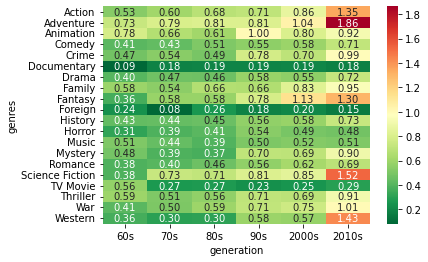

In [18]:
plt.Figure(figsize=(14,6))
sns.heatmap(df_genres, cmap='RdYlGn_r', annot=True, fmt='.2f')

it can be seen from the heatmap that Animation movies are the most popular in the 60s and 90s, while Adventure movies are the most popular in the 2010s, 80s and 70s but fantasy movies are the most popular in the 2000s

In [19]:
def plot(generation):
    """plot barh graph of popularity of each genre in a given generation
    generation (str): name of the generation
    """
    plt.Figure(figsize=(14,6))
    y_ticks = [genres_pop[genre][f'{generation}'] for genre in unique_genres]
    plt.barh(x_ticks, y_ticks)
    plt.title(f'Popularity of Genres in {generation}')
    plt.xlabel('Mean Popularity')
    plt.show()

def plot_bar_chart(x_ticks, y_ticks, title, xlabel, ylabel):
    """plot bar graph
    """
    plt.Figure(figsize=(14,6))
    plt.bar(x_ticks, y_ticks)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

### Research Question 2  (What infact does movie budget have on its popularity and Score rating?)
> for this question, i plan to explore whether movie budget have an infact on its popularity and vote_average
> the columns i am going to use are the popularity, score_rating and budget columns
##### create dataset set containing only this columns

In [20]:
def create_data_set(needed_columns):
    """creates a new dataset from the needed columns
    needed_columns (list): list of columns to include
    """
    df_new = df.iloc[:, df.columns.isin(needed_columns)]
    df_new.head()
    return df_new

In [21]:
needed_columns = ['budget', 'popularity', 'vote_average']
df_q2 = create_data_set(needed_columns).copy()

In [22]:
# create popularity levels
df_q2 = generate_levels(df_q2, 'popularity', ['Low', 'Medium', 'Moderately High', 'High']).copy()
# create budget levels
df_q2 = generate_levels(df_q2, 'budget', ['Low', 'Medium', 'Moderately High', 'High']).copy()


calculate mean popularity and vote-average for all the budget levels

In [23]:
mean_pop = df_q2.groupby('budget_level').mean()['popularity']
mean_vote = df_q2.groupby('budget_level').mean()['vote_average']


##### Plot bar chart of budget level and mean popularity

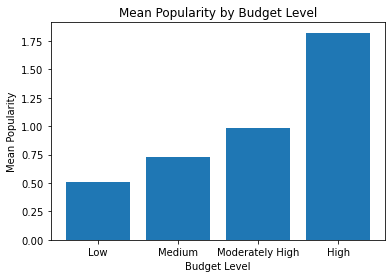

In [24]:
plot_bar_chart(mean_pop.index, mean_pop, 'Mean Popularity by Budget Level', 'Budget Level', 'Mean Popularity')

As seen from the bar chart, movies with higher budget tend to be more popular

##### Plot bar chart of budget level and mean vote_average

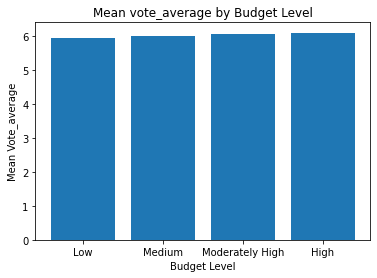

In [25]:
plot_bar_chart(mean_vote.index, mean_vote, 'Mean vote_average by Budget Level', 'Budget Level', 'Mean Vote_average')

The bar graph does not show a clear distinction between the budget levels, meaning, the budget level of a movie has little or no infact on its vote_average

### Research Question 3  (Are movies with high runtime most popular?)
> for this question, i plan to explore whether movies with high run time a most popularity
> the columns i am going to use are the popularity and runtime
##### create dataset set containing only this columns

In [26]:
needed_columns = ['popularity', 'runtime']
df_q3 = create_data_set(needed_columns).copy()

In [27]:
df_q3.describe()

,popularity,runtime
count,10834.000000,10834.000000
mean,0.647762,102.363855
std,1.001204,30.948225
min,0.000065,2.000000
25%,0.208536,90.000000
50%,0.384691,99.000000
75%,0.715448,112.000000
max,32.985763,900.000000


Group the run time into levels

In [28]:
df_q3 = generate_levels(df_q3, 'runtime', ['Low', 'Medium', 'Moderately High', 'High']).copy()

In [29]:
mean_pop = df_q3.groupby('runtime_level').mean()['popularity']
mean_pop

runtime_level
Low                0.410934
Medium             0.549395
Moderately High    0.653673
High               1.014841
Name: popularity, dtype: float64

##### Plot bar chart of runtime_level and mean_popularity

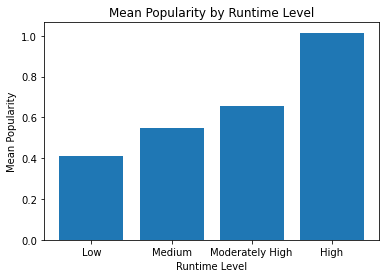

In [30]:
plot_bar_chart(mean_pop.index, mean_pop, 'Mean Popularity by Runtime Level', 'Runtime Level', 'Mean Popularity')

It can be observed from the bar chart that movies with high runtime tend to be more popular

### Research Question 4  (Does popular movies generate more revenue?)
> for this question, i plan to explore whether popular movies generate more revenue
> the columns i am going to use are the popularity and revenue
##### create dataset set containing only this columns

In [31]:
needed_columns = ['popularity', 'revenue']
df_q4 = create_data_set(needed_columns).copy()

Lets Nomalize the columns so that all values will be in the same range 

In [32]:
df_q4.loc[:, 'revenue'] = df_q4['revenue'] / df_q4.revenue.max()
df_q4.loc[:,'popularity'] = df_q4['popularity'] / df_q4.popularity.max()
df_q4.head()


,popularity,revenue
0,1.000000,0.544140
1,0.861582,0.136054
2,0.397520,0.106143
3,0.338725,0.743546
4,0.283001,0.541523


Plot a scatter plot to show the relationship between popularity and revenue

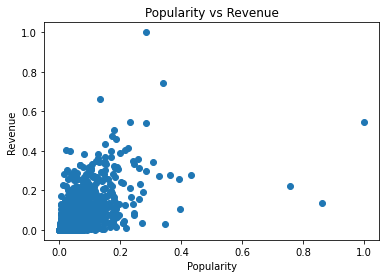

In [33]:
plt.Figure(figsize=(14,6))
plt.scatter(df_q4['popularity'], df_q4['revenue'])
plt.title('Popularity vs Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.show()

As can be seen from the plot, their is no clear relationship between popularity and generated revenue, thus implying that the popularity of a movie does not infact the revenue generated by the movie

<a id='conclusions'></a>
## Conclusions

#### Question 1 (Which genres have the most popularity by generation?)
    As can be seen from the visuals of question1, it can be concluded that the most popular genres per generation are:
######  60s ---> Animation
######   70s ---> Adventure
######   80s ---> Adventure
######   90s ---> Animation
######   2000s ---> Fantasy
######   2010s ----> Adventure
    Limitation
    One possible limitation in this exploration is that a movie can have many genres e.g a movie can be Comedy and Horror at the same time, so it cannot be concluded that the popularity of the movie is becouse of only one of the genres
#### Question 2 (What infact does movie budget have on its popularity and average voting?)
    From the plot of mean popularity and budget level, it can be concluded that the higher the budget level of a movie the more popular it is. 
    While it can be seen from the plot of vote_avrage and budget level that the level of budget of a movie has no infact on its average voting.
#### Question 3 (Are movies with high runtime most popular?)
    From the analysis that was performed for question 3, it can be concluded that movies with high runtime are indeed the most popular
#### Question 4 (Does popular movies generate more revenue?)
    From the analysis that was performed for question 4, it can be concluded that movie bieng popular just not necessarily means it will generate high revenue

##### Limitation
    As the dataset we used is a sampled data, i.e it does not contain information about all the movies, one can argue that the sample size is not enough, thus making any conclution from the dataset not genelizable to all movies 
 